In [ ]:
pip install ultralytics

In [8]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os
from ultralytics import YOLO

In [2]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip(r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2.zip")

Extracted all


In [2]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [3]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [4]:
#Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.extend(glob.glob(image_paths+'/*.bmp'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [5]:
import os

# Directory containing the images
image_dir = r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images"

# Get a list of all image files in the directory
all_images = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Directory containing the label files
label_dir = r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\labels"

# Iterate through images and labels
for image_path in all_images:
    # Extract the image name without extension
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    
    # Construct the path to the corresponding label file
    label_path = os.path.join(label_dir, f"{image_name}.txt")
    
    # Check if the label file exists
    if os.path.exists(label_path):
        # Open the label file and read the contents
        with open(label_path, 'r') as f:
            label_data = f.read()
        
        # Process the label data as needed
        print(f"Label data for {image_path}: {label_data}")
    else:
        print(f"No label file found for {image_path}")

Label data for C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231221_png.rf.892eb0b39da3410396bfe210a7afa588.jpg: 14 0.571875 0.190625 0.225 0.1015625
12 0.5015625 0.45546875 0.284375 0.20625
4 0.51640625 0.7734375 0.1234375 0.2484375
Label data for C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231221_png.rf.caa5388020a7dfce445416a81a6a627e.jpg: 14 0.190625 0.428125 0.1015625 0.22421875
12 0.45546875 0.4984375 0.20546875 0.284375
4 0.7734375 0.48359375 0.2484375 0.1234375
Label data for C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231229_png.rf.6fbc200024db7f2ac21376784386e50d.jpg: 7 0.1234375 0.51640625 0.2078125 0.37109375
4 0.41640625 0.21796875 0.08984375 0.2484375
14 0.63359375 0.2 0.165625 0.2015625
Label data for C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images\Screenshot-2024-02-10-231229_png.rf.dbb1a77803a430e9d6934e8f4a564bef.jpg: 7 0.51640625 0.8765625 0.371

Label data for Screenshot-2024-02-10-233009_png.rf.1adcc81b5808f5669fea83c9e28ad652.jpg: ['12', '0.13515625', '0.53984375', '0.17109375', '0.471875', '3', '0.528125', '0.2359375', '0.24296875', '0.378125', '4', '0.81171875', '0.584375', '0.15703125', '0.1890625']
Label data for Screenshot-2024-02-10-233457_png.rf.877f99a6009a94fd6d3c3f35ea83a5e2.jpg: ['4', '0.44375', '0.60859375', '0.128125', '0.225', '4', '0.675', '0.6', '0.1078125', '0.25', '8', '0.51171875', '0.31171875', '0.346875', '0.315625']
Label data for Screenshot-2024-02-22-183228_png.rf.6ebb757e908ab281cd66005ff08a2d88.jpg: ['6', '0.2109375', '0.54609375', '0.246875', '0.153125', '2', '0.46171875', '0.25234375', '0.225', '0.325', '7', '0.79921875', '0.54296875', '0.284375', '0.3828125']
Label data for Screenshot-2024-02-11-001029_png.rf.f53110f4994c5a1a8aeca4de0669afd8.jpg: ['14', '0.46328125', '0.7546875', '0.234375', '0.2453125', '9', '0.41484375', '0.190625', '0.21484375', '0.31171875', '3', '0.70859375', '0.23359375', '

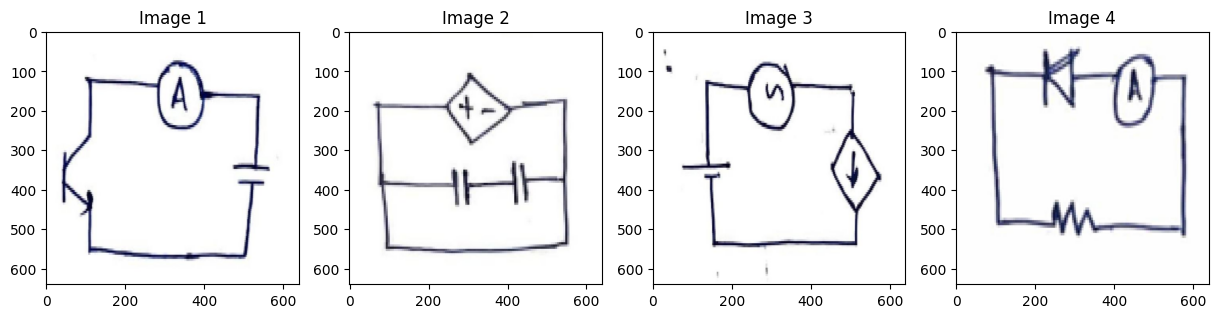

In [6]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def plot(image_paths, label_dir, num_samples):
    # Load the list of image paths
    all_images = os.listdir(image_paths)
    
    # Shuffle the list of image paths
    random.shuffle(all_images)
    
    # Visualize a few training images
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0, len(all_images)-1)
        image_name = all_images[j]
        image_path = os.path.join(image_paths, image_name)
        
        # Read and display the image
        image = cv2.imread(image_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i+1}")
        
        # Load the corresponding label data from the .txt file
        label_file_path = os.path.join(label_dir, image_name[:-4] + '.txt')
        with open(label_file_path, 'r') as f:
            label_data = f.read().strip().split()  # Read label data from the file
            print(f"Label data for {image_name}: {label_data}")
            # Process the label data as needed
        
    plt.show()

# Example usage
plot(
    image_paths=r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\images", 
    label_dir= r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\train\labels",
    num_samples=4,
)


In [7]:
model = YOLO("yolov8x.pt")

NameError: name 'YOLO' is not defined

In [9]:
results = model.train(data=r"C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\data.yaml",epochs=1)

New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.11.4 torch-2.2.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=C:\Users\tanis\Downloads\circuits.v1i.yolov8v2\data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning C:\Users\tanis\Downloads\train\labels.cache... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]
val: Scanning C:\Users\tanis\Downloads\valid\labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G       2.52      4.788      2.504         84        640:  19%|█▉        | 4/21 [13:54<1:00:40, 214.15s/it]

In [ ]:
infer = YOLO("E:\\Research\\runs\\detect\\train2\\weights\\best.pt") 
results = infer.predict("E:\Research\circuitdataset\circuit\Screenshot 2024-02-10 232211.png", save=True)

In [9]:
infer = YOLO("yolov8x.pt")
results = infer.predict(r"C:\Users\tanis\OneDrive\Desktop\circuit\Screenshot 2024-02-10 231120.png", save=True)



image 1/1 C:\Users\tanis\OneDrive\Desktop\circuit\Screenshot 2024-02-10 231120.png: 640x640 1 refrigerator, 1688.3ms
Speed: 9.6ms preprocess, 1688.3ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
